# B W Photo Colorization
**Based on "Black and white image colorization with OpenCV and Deep Learning", by Dr. Adrian Rosebrok:**<br>
https://www.pyimagesearch.com/2019/02/25/black-and-white-image-colorization-with-opencv-and-deep-learning/

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [110]:
def colorize(IMAGE):   
    prototxt = "./model/colorization_deploy_v2.prototxt"
    model = "./model/colorization_release_v2.caffemodel"
    points = "./model/pts_in_hull.npy"
    image =  "./input_images/"+IMAGE

    net = cv2.dnn.readNetFromCaffe(prototxt, model)
    pts = np.load(points)

    class8 = net.getLayerId("class8_ab")
    conv8 = net.getLayerId("conv8_313_rh")
    pts = pts.transpose().reshape(2, 313, 1, 1)
    net.getLayer(class8).blobs = [pts.astype("float32")]
    net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    scaled = image.astype("float32") / 255.0
    lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)

    resized = cv2.resize(lab, (224, 224))
    L = cv2.split(resized)[0]
    L -= 50

    net.setInput(cv2.dnn.blobFromImage(L))
    ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
    ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

    L = cv2.split(lab)[0]
    colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
    colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
    colorized = np.clip(colorized, 0, 1)
    colorized = (255 * colorized).astype("uint8")
    

    plt.figure(1, figsize=(14,6))
    plt.subplots_adjust(wspace=0.1)
    plt.subplot(121)
    plt.axis('off');
    plt.imshow(image)

    plt.subplot(122)
    plt.axis('off');
    plt.imshow(colorized)
    
    return colorized

---

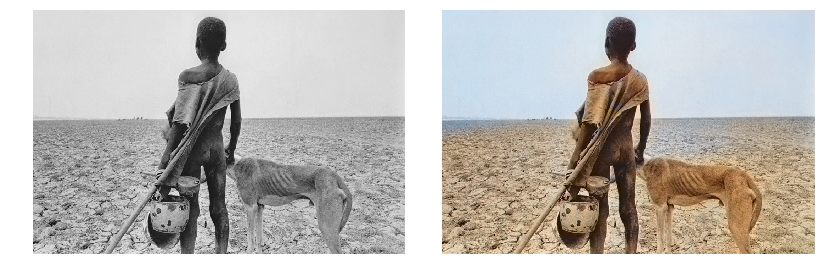

In [111]:
IMAGE =  "salgado_8.jpg"
color = colorize(IMAGE)

In [108]:
cv2.imwrite("./colorized_images/Color_"+IMAGE, cv2.cvtColor(color, cv2.COLOR_RGB2BGR))

True